In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset.csv")
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [3]:
df.drop(['day', 'month', 'year'],inplace=True,axis=1)

df["Classes"] = np.where(df["Classes"].str.strip() == "not fire",0,1)

df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [4]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [5]:
x = df.drop("FWI",axis=1)
y = df["FWI"]
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25,random_state=42)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("Y_train shape:",Y_train.shape)
print("Y_test shape:",Y_test.shape)

X_train shape: (182, 11)
X_test shape: (61, 11)
Y_train shape: (182,)
Y_test shape: (61,)


<Axes: >

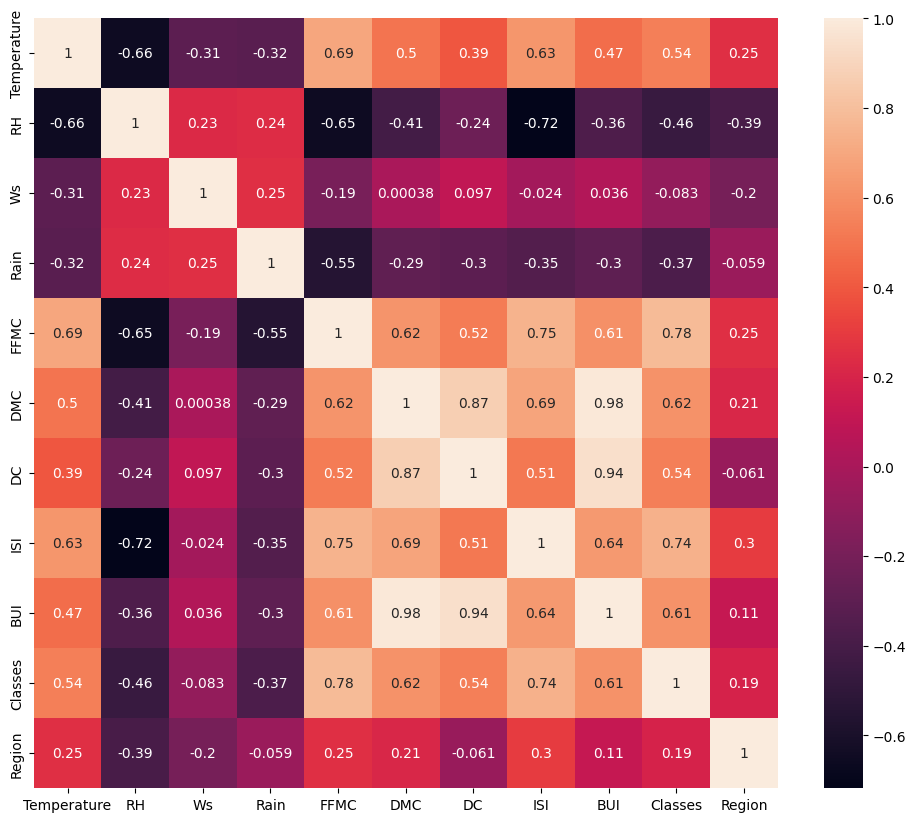

In [7]:
## Feature selection based on corr

corr = X_train.corr()
corr
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)

In [8]:
## Check for multilinearity

def corelation(dataset,threshold):
    col_corr = set()
    corr = dataset.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold:
                name = corr.columns[i];
                col_corr.add(name)
    
    return col_corr


col_set = corelation(X_train,0.85)
col_set

{'BUI', 'DC'}

In [9]:

# drop features
X_train.drop(col_set,axis=1,inplace=True)
X_test.drop(col_set,axis=1,inplace=True)
X_test.shape, X_train.shape

((61, 9), (182, 9))

In [10]:
# Sandardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

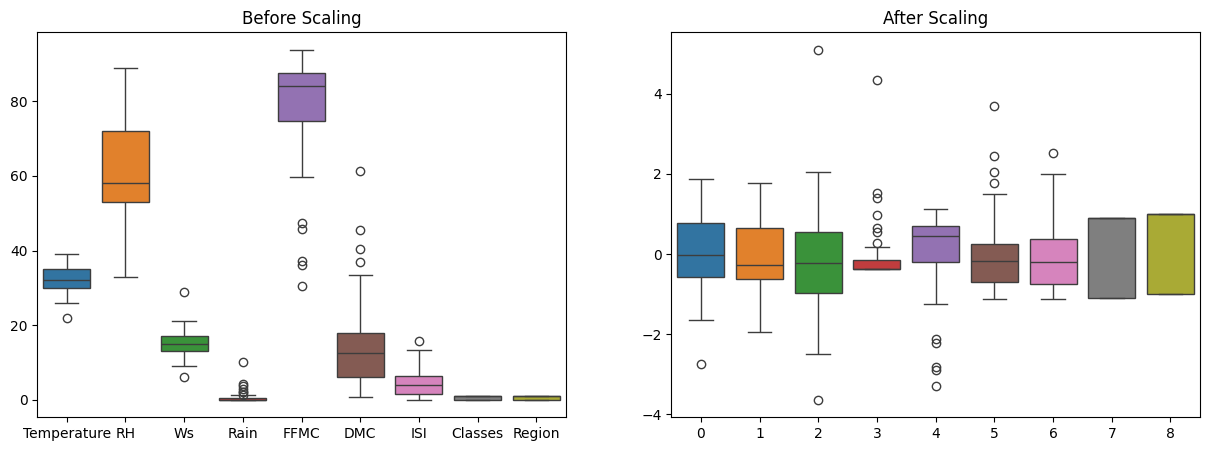

In [11]:
# Effection of Standedization
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_test)
plt.title("Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(X_test_scaled)
plt.title("After Scaling")
plt.show()

### Linear Regeression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

linreg = LinearRegression()

linreg.fit(X_train_scaled,Y_train)
y_pred = linreg.predict(X_test_scaled)

print("MAE:",mean_absolute_error(Y_test,y_pred))
print("MSE:",mean_squared_error(Y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R2 Score:",r2_score(Y_test,y_pred))


MAE: 0.5468236465249978
MSE: 0.674276687379158
RMSE: 0.8211435242265253
R2 Score: 0.9847657384266951


### Lasso Regression

In [13]:
from sklearn.linear_model import Lasso  
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lassreg = Lasso()

lassreg.fit(X_train_scaled,Y_train) 
y_pred = lassreg.predict(X_test_scaled)

print("MAE:",mean_absolute_error(Y_test,y_pred))
print("MSE:",mean_squared_error(Y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R2 Score:",r2_score(Y_test,y_pred))

MAE: 1.133175994914409
MSE: 2.2483458918974772
RMSE: 1.4994485292591664
R2 Score: 0.9492020263112388


### Cross Validation Lasso

In [14]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)

lassocv.fit(X_train_scaled,Y_train)

y_pred = lassocv.predict(X_test_scaled)


print("MAE:",mean_absolute_error(Y_test,y_pred))
print("MSE:",mean_squared_error(Y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R2 Score:",r2_score(Y_test,y_pred))

MAE: 0.619970115826343
MSE: 0.792499555474362
RMSE: 0.8902244410677355
R2 Score: 0.9820946715928275


In [15]:
lassocv.get_params()

{'alphas': 'warn',
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 'deprecated',
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

### Ridge Regression

In [16]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

ridge = Ridge()

ridge.fit(X_train_scaled,Y_train) 
y_pred = ridge.predict(X_test_scaled)

print("MAE:",mean_absolute_error(Y_test,y_pred))
print("MSE:",mean_squared_error(Y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R2 Score:",r2_score(Y_test,y_pred))

MAE: 0.5642305340105715
MSE: 0.6949198918152096
RMSE: 0.8336185529456561
R2 Score: 0.9842993364555512


In [17]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,Y_train)
y_pred = ridgecv.predict(X_test_scaled)

print("MAE:",mean_absolute_error(Y_test,y_pred))
print("MSE:",mean_squared_error(Y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R2 Score:",r2_score(Y_test,y_pred))


MAE: 0.5642305340105715
MSE: 0.6949198918152096
RMSE: 0.8336185529456561
R2 Score: 0.9842993364555512


In [18]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

### Elasticnet

In [19]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

elastic = ElasticNet()

elastic.fit(X_train_scaled,Y_train) 
y_pred = elastic.predict(X_test_scaled)

print("MAE:",mean_absolute_error(Y_test,y_pred))
print("MSE:",mean_squared_error(Y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R2 Score:",r2_score(Y_test,y_pred))

MAE: 1.8822353634896005
MSE: 5.5172511010252245
RMSE: 2.3488829474933874
R2 Score: 0.8753460589519703


In [20]:
from sklearn.linear_model import ElasticNetCV

elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,Y_train)
y_pred = elasticnetcv.predict(X_test_scaled)

print("MAE:",mean_absolute_error(Y_test,y_pred))
print("MSE:",mean_squared_error(Y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R2 Score:",r2_score(Y_test,y_pred))


MAE: 0.6575946731430898
MSE: 0.8222830416276258
RMSE: 0.906798236449336
R2 Score: 0.9814217587854941


In [21]:
elasticnetcv.get_params()

{'alphas': 'warn',
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 'deprecated',
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

### Pickling

In [22]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [23]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [25]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open("ridge.pkl","wb"))
